In [1]:
import csv

import pandas as pd

data = pd.read_csv("creditcard.csv")
data.head()

# Display the first few rows of the DataFrame
print(data.head())  # Shows the first 5 rows by default
print(data.shape)

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, fbeta_score, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.tree import plot_tree

In [3]:
X = data.drop('Class', axis=1)  # Features
y = data['Class']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalize features for KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [4]:
print(X.shape)
print(y.shape)

(284807, 30)
(284807,)


In [5]:

# Define models
nn_model = MLPClassifier(random_state=42, max_iter=1000)
rf_model = RandomForestClassifier(random_state=42)
dec_model = DecisionTreeClassifier(random_state=42)
knn_model = KNeighborsClassifier(n_neighbors=2)
lr_model = LogisticRegression()

models = {
    "Neural Network": nn_model,
    "Random Forest": rf_model,
    "Decision Tree": dec_model,
    "K-Nearest Neighbors": knn_model,
    "Logistic Regression": lr_model
}

In [6]:
nn_model.fit(X_train, y_train)

MLPClassifier(max_iter=1000, random_state=42)

In [7]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

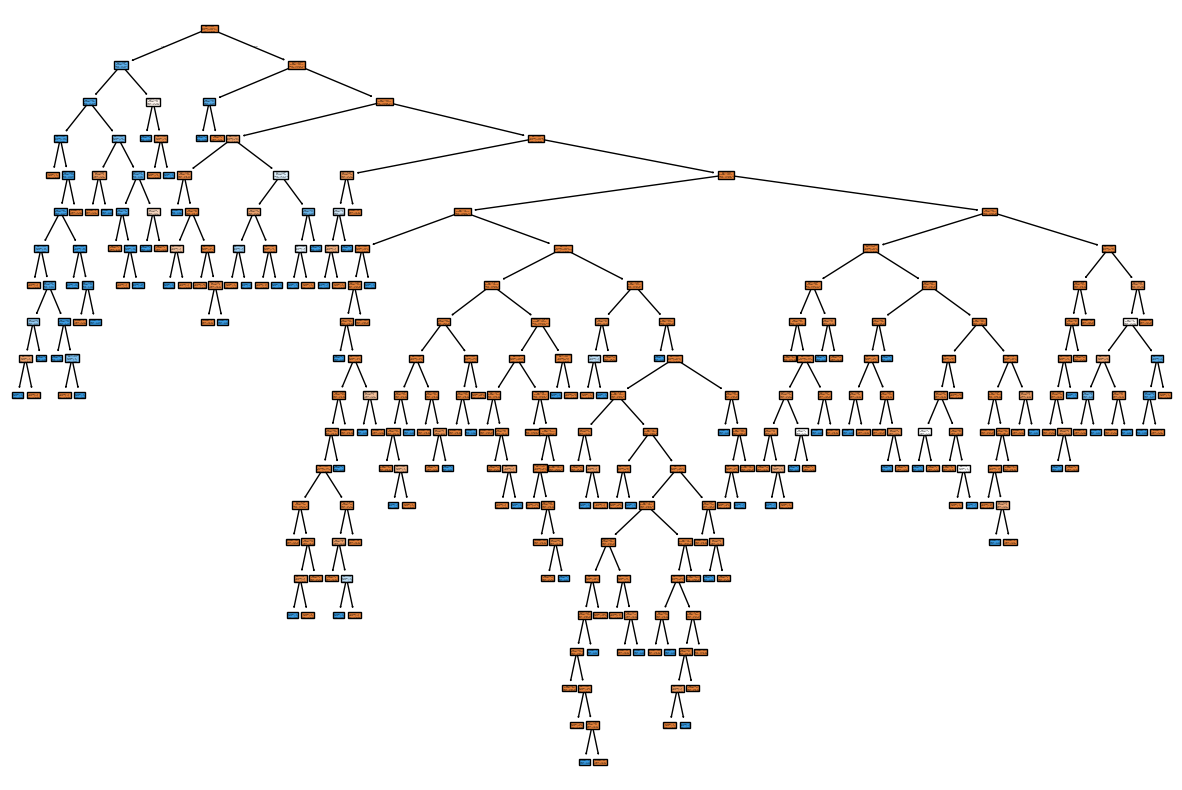

In [8]:
# Plot the decision tree
plt.figure(figsize=(15, 10))
plot_tree(rf_model.estimators_[0], filled=True, feature_names=X.columns, class_names=['No Fraud', 'Fraud'])
plt.show()

In [9]:
dec_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

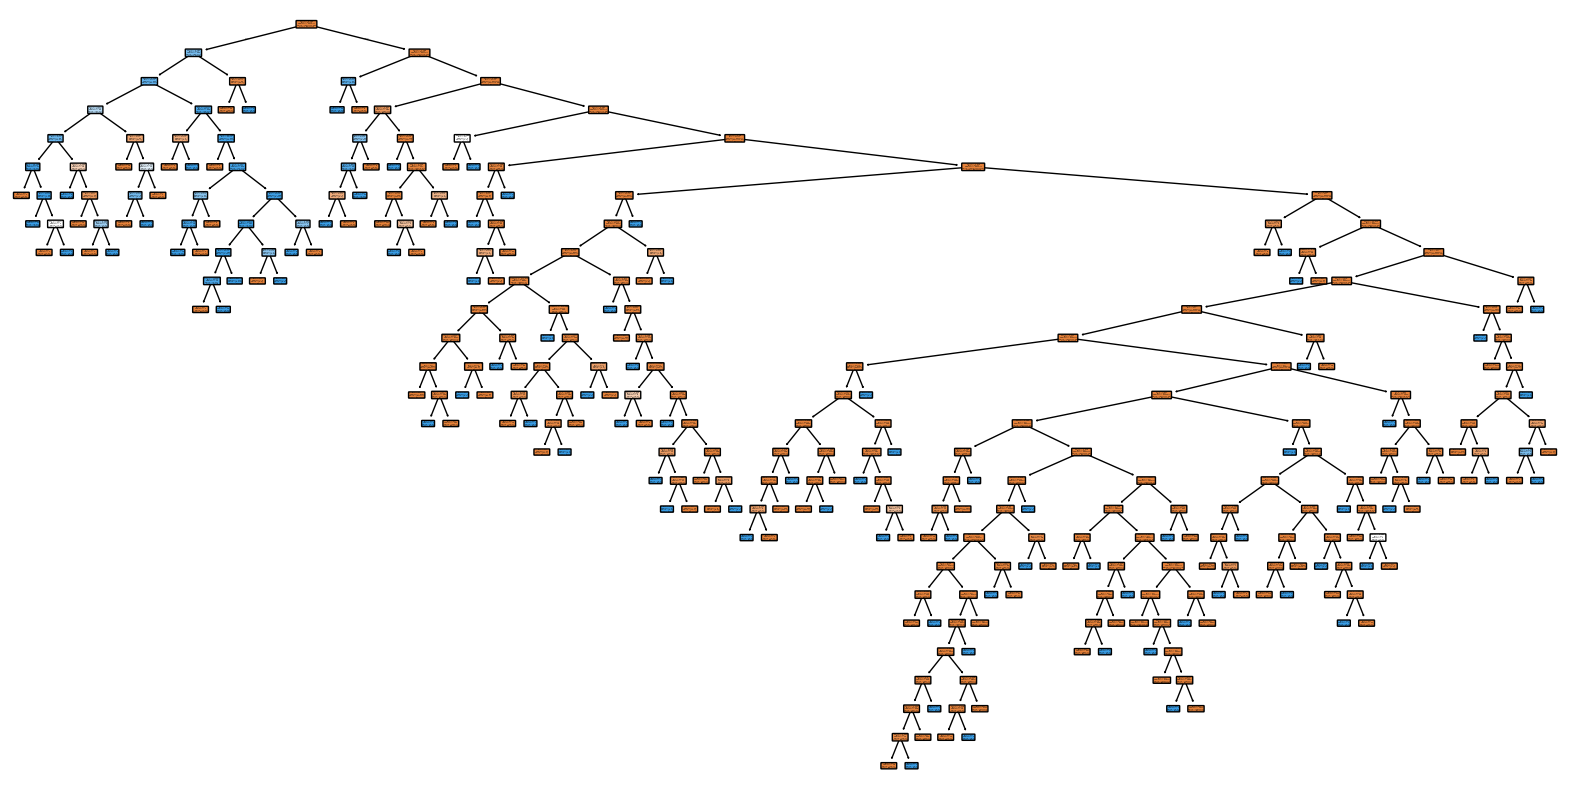

In [10]:
# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(dec_model, filled=True, feature_names=X.columns, class_names=['No Fraud', 'Fraud'], rounded=True, proportion=False)
plt.show()


In [11]:
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=2)

In [12]:
lr_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [13]:
# Stored values
y_probs = {}
y_pred = {}


# Compute predictions and probabilities
for name, model in models.items():

    if(name == "K-Nearest Neighbors" or name == "Logistic Regression"):
        y_probs[name] = model.predict_proba(X_test_scaled)[:, 1]
        y_pred[name] = model.predict(X_test_scaled)
    else:        
        y_probs[name] = model.predict_proba(X_test)[:, 1]
        y_pred[name] = model.predict(X_test)

In [105]:
# Compute predictions and probabilities
for name, model in models.items():

    print("\nClassification Report:", name, "\n", classification_report(y_test, y_pred[name]))
    
    # Compute F-beta score to favor recall over precision
    fbeta = fbeta_score(y_test, y_pred[name], beta=2.0) 
    print("F(beta=2.0)-score:", fbeta)
    print("F1-score:", f1_score(y_test, y_pred[name]), "\n")



Classification Report: Neural Network 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.68      0.68      0.68        98

    accuracy                           1.00     56962
   macro avg       0.84      0.84      0.84     56962
weighted avg       1.00      1.00      1.00     56962

F(beta=2.0)-score: 0.6836734693877551
F1-score: 0.6836734693877551 


Classification Report: Random Forest 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.82      0.87        98

    accuracy                           1.00     56962
   macro avg       0.97      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962

F(beta=2.0)-score: 0.8385744234800838
F1-score: 0.8743169398907104 


Classification Report: Decision Tree 
               precision    recall  f1-score   support

           0       1.00      1.0

# FPR TPR Based Threshold


Classification Report: Neural Network 
               precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.03      0.77      0.06        98

    accuracy                           0.96     56962
   macro avg       0.52      0.86      0.52     56962
weighted avg       1.00      0.96      0.98     56962

Optimal threshold: 4.766902660720438e-81
F(beta=0.5)-score: 0.04096569805549487 


Classification Report: Random Forest 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.46      0.91      0.61        98

    accuracy                           1.00     56962
   macro avg       0.73      0.95      0.81     56962
weighted avg       1.00      1.00      1.00     56962

Optimal threshold: 0.04
F(beta=0.5)-score: 0.5138568129330254 


Classification Report: Decision Tree 
               precision    recall  f1-score   support

           0       1.00 

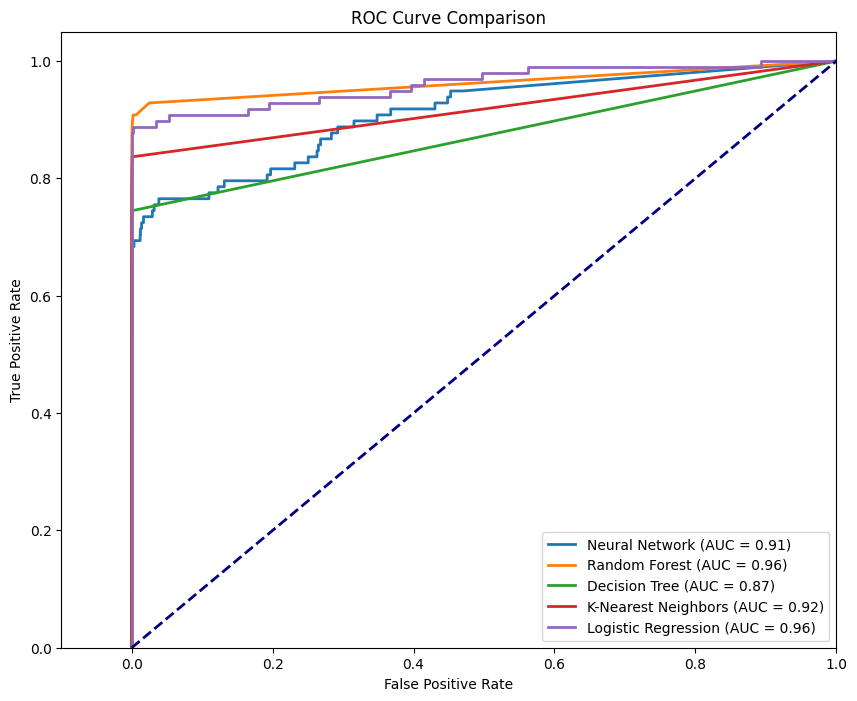

Neural Network: AUC = 0.91
Random Forest: AUC = 0.96
Decision Tree: AUC = 0.87
K-Nearest Neighbors: AUC = 0.92
Logistic Regression: AUC = 0.96


In [106]:
# Stored values
roc_auc_scores = {}
thresholds = {}
optimum_thresholds_roc = {}
y_pred_roc_threshold = {}

# Plotting the ROC curves
plt.figure(figsize=(10, 8))

for name, model in models.items():
    
    # Calculate the AUC score
    roc_auc = roc_auc_score(y_test, y_probs[name])
    roc_auc_scores[name] = roc_auc
    
    # Compute ROC curve
    fpr, tpr, thresholds[name] = roc_curve(y_test, y_probs[name])

    # Compute optimum threshold based on Youden's Index (TPR - FPR)
    youden_index = tpr - fpr
    optimum_thresholds_roc[name] = thresholds[name][np.argmax(youden_index)]

    # Choose the threshold based on Youden's Index
    y_pred_roc_threshold[name] = (y_probs[name] >= optimum_thresholds_roc[name]).astype(int)

    print("\nClassification Report:", name, "\n", classification_report(y_test, y_pred_roc_threshold[name]))
    print ("Optimal threshold:", optimum_thresholds_roc[name])
    # Compute F-beta score to favor recall over precision
    fbeta = fbeta_score(y_test, y_pred_roc_threshold[name], beta=0.5) 
    print("F(beta=0.5)-score:", fbeta, "\n")
    
    # Plot ROC curve
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Customize the plot
plt.xlim([-0.1, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.show()

# Print the AUC scores for each model
for name, score in roc_auc_scores.items():
    print(f'{name}: AUC = {score:.2f}')

# Precision Recall Based Threshold


Classification Report: Neural Network 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.80      0.65      0.72        98

    accuracy                           1.00     56962
   macro avg       0.90      0.83      0.86     56962
weighted avg       1.00      1.00      1.00     56962

Optimal threshold: 1.0
F(beta=2.0)-score: 0.6779661016949152 


Classification Report: Random Forest 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.93      0.86      0.89        98

    accuracy                           1.00     56962
   macro avg       0.97      0.93      0.95     56962
weighted avg       1.00      1.00      1.00     56962

Optimal threshold: 0.41
F(beta=2.0)-score: 0.8713692946058091 


Classification Report: Decision Tree 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00

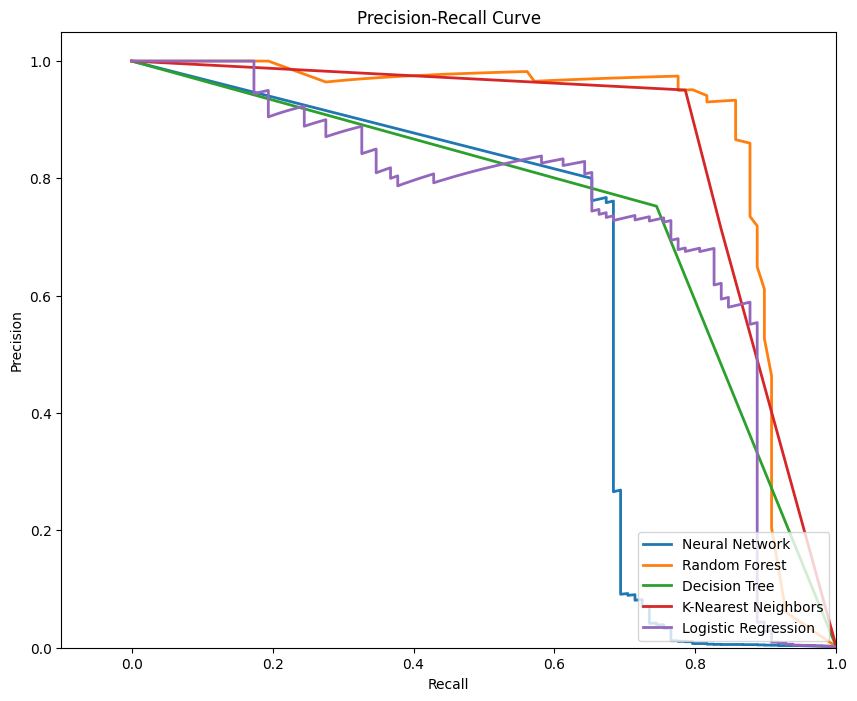

In [107]:
# Stored values
optimal_thresholds_pr = {}

y_pred_pr_threshold = {}
# Plotting the Precision-Recall curves
plt.figure(figsize=(10, 8))

for name, model in models.items():
        
    # Compute precision-recall curve
    precision, recall, threshold = precision_recall_curve(y_test, y_probs[name])
    # Choose a threshold based on the desired balance
    optimal_thresholds_pr[name] = threshold[np.argmax(precision + recall)]

    # Choose the threshold based on precision + recall
    y_pred_pr_threshold[name] = (y_probs[name] >= optimal_thresholds_pr[name]).astype(int)

    print("\nClassification Report:", name, "\n", classification_report(y_test, y_pred_pr_threshold[name]))
    print ("Optimal threshold:", optimal_thresholds_pr[name])
    # Compute F-beta score to favor recall over precision
    fbeta = fbeta_score(y_test, y_pred_pr_threshold[name], beta=2.0) 
    print("F(beta=2.0)-score:", fbeta, "\n")
    
    # Plot precision-recall curve
    plt.plot(recall, precision, label=f'{name}', lw=2)


# Customize the plot
plt.xlim([-0.1, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()

# Scratch Work

In [ ]:
# from sklearn.metrics import f1_score
# import numpy as np

# # Assume y_prob contains the predicted probabilities and y_true contains the actual labels
# thresholds = np.arange(0.0, 1.0, 0.01)
# f1_scores = []

# for threshold in thresholds:
#     y_pred = (y_prob >= threshold).astype(int)
#     f1 = f1_score(y_true, y_pred)
#     f1_scores.append(f1)

# best_threshold = thresholds[np.argmax(f1_scores)]

In [84]:
def get_metrics(model, X_test, y_test):
    y_pred = model.predict(X_test)

    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return precision, recall, f1

## Maximize F1 Threshold

In [14]:
# Stored values
optimal_thresholds_f1 = {}
y_pred_f1 = {}

# Plotting the Precision-Recall curves
plt.figure(figsize=(10, 8))

for name, model in models.items():
        
    # Assume y_prob contains the predicted probabilities and y_true contains the actual labels
    thresholds = np.arange(0.0, 1.0, 0.01)
    f1_scores = []

    for threshold in thresholds:
        y_pred_thresh = (y_probs[name] >= threshold).astype(int)
        f1 = f1_score(y_test, y_pred_thresh)
        f1_scores.append(f1)

    optimal_thresholds_f1[name] = thresholds[np.argmax(f1_scores)]
    y_pred_f1[name] = (y_probs[name] >= optimal_thresholds_f1[name]).astype(int)
    print("\nClassification Report Maximizing F1:", name, "\n", classification_report(y_test, y_pred_f1[name]))
    print ("Optimal threshold:", optimal_thresholds_f1[name])
    # Compute F-beta score to favor recall over precision
    fbeta = fbeta_score(y_test,y_pred_f1[name], beta=2.0) 
    print("F(beta=2.0)-score:", fbeta)
    print("F1-score:", f1_score(y_test, y_pred_f1[name]), "\n")



Classification Report Maximizing F1: Neural Network 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.71      0.68      0.70        98

    accuracy                           1.00     56962
   macro avg       0.86      0.84      0.85     56962
weighted avg       1.00      1.00      1.00     56962

Optimal threshold: 0.98
F(beta=2.0)-score: 0.6893004115226338
F1-score: 0.6979166666666666 


Classification Report Maximizing F1: Random Forest 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.93      0.86      0.89        98

    accuracy                           1.00     56962
   macro avg       0.97      0.93      0.95     56962
weighted avg       1.00      1.00      1.00     56962

Optimal threshold: 0.4
F(beta=2.0)-score: 0.8713692946058091
F1-score: 0.8936170212765957 


Classification Report Maximizing F1: Decision Tree 

<Figure size 1000x800 with 0 Axes>

## Maximize F2

In [73]:
# Stored values
optimal_thresholds_fb = {}
y_pred_fb = {}

# Plotting the Precision-Recall curves
plt.figure(figsize=(10, 8))

for name, model in models.items():
        
    # Assume y_prob contains the predicted probabilities and y_true contains the actual labels
    thresholds = np.arange(0.0, 1.0, 0.01)
    fb_scores = []

    for threshold in thresholds:
        y_pred_thresh = (y_probs[name] >= threshold).astype(int)
        fb = fbeta_score(y_test, y_pred_thresh, beta=2.0) 
        fb_scores.append(fb)

    optimal_thresholds_fb[name] = thresholds[np.argmax(fb_scores)]
    y_pred_fb[name] = (y_probs[name] >= optimal_thresholds_fb[name]).astype(int)
    print("\nClassification Report for Maximizing F2:", name, "\n", classification_report(y_test, y_pred_fb[name]))
    print ("Optimal threshold:", optimal_thresholds_fb[name])
    # Compute F-beta score to favor recall over precision
    fbeta = fbeta_score(y_test, y_pred_fb[name], beta=2.0) 
    print("F(beta=2.0)-score:", fbeta)
    print("F1-score:", f1_score(y_test, y_pred_fb[name]), "\n")


Classification Report for Maximizing F2: Neural Network 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.71      0.68      0.70        98

    accuracy                           1.00     56962
   macro avg       0.86      0.84      0.85     56962
weighted avg       1.00      1.00      1.00     56962

Optimal threshold: 0.98
F(beta=2.0)-score: 0.6893004115226338
F1-score: 0.6979166666666666 


Classification Report for Maximizing F2: Random Forest 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.88      0.87        98

    accuracy                           1.00     56962
   macro avg       0.93      0.94      0.93     56962
weighted avg       1.00      1.00      1.00     56962

Optimal threshold: 0.3
F(beta=2.0)-score: 0.8739837398373984
F1-score: 0.8686868686868687 


Classification Report for Maximizing F2: De

<Figure size 1000x800 with 0 Axes>


Confusion Matrix: Random Forest, Threshold = 0.3
[[56850    14]
 [   12    86]]


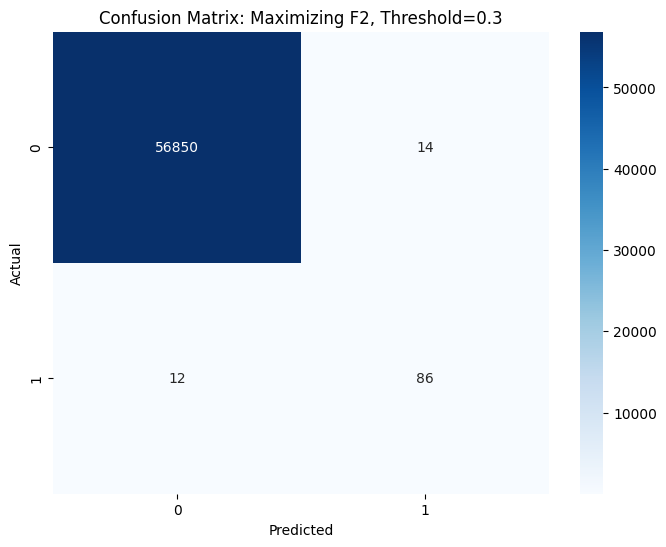

In [89]:
print("\nConfusion Matrix: Random Forest, Threshold = 0.3")
conf_matrix = confusion_matrix(y_test, y_pred_fb["Random Forest"])
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix: Maximizing F2, Threshold=0.3')
plt.show()


Confusion Matrix: Random Forest
[[56859     5]
 [   18    80]]


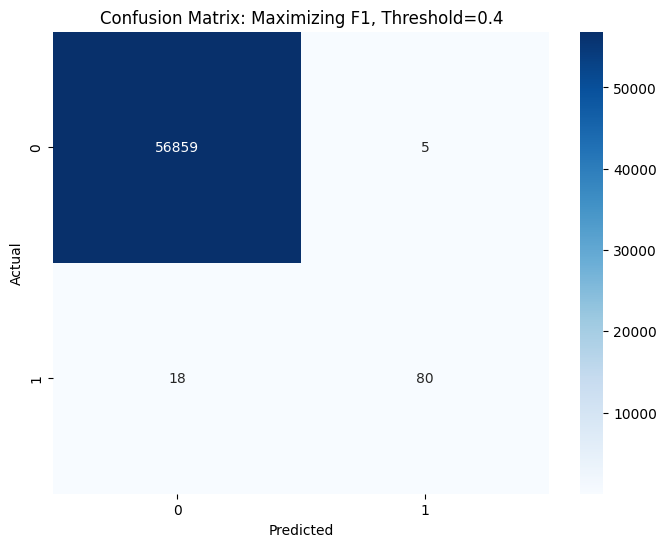

In [15]:
print("\nConfusion Matrix: Random Forest")
conf_matrix = confusion_matrix(y_test, y_pred["Random Forest"])
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix: Maximizing F1, Threshold=0.4')
plt.show()


Confusion Matrix: Random Forest
[[56858     6]
 [   14    84]]


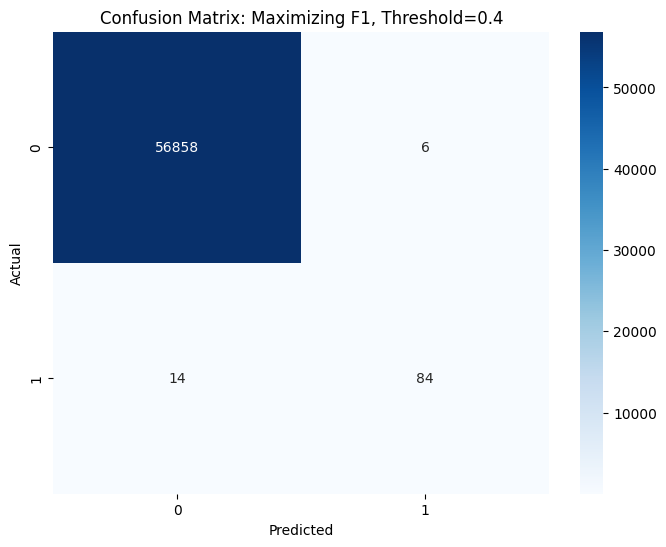

In [16]:
print("\nConfusion Matrix: Random Forest")
conf_matrix = confusion_matrix(y_test, y_pred_f1["Random Forest"])
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix: Maximizing F1, Threshold=0.4')
plt.show()

# Keras Model

In [39]:
!pip install tensorflow

  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached tensorflow_io_gcs_filesystem-0.31.0-cp311-cp311-win_amd64.whl.metadata (14 kB)
  Using cached namex-0.0.8-py3-none-any.whl.metadata (246 bytes)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
  Using cached markdown_it_py-3.0.0-py3-none-any.whl.metadata (6.9 kB)
  Using cached mdurl-0.1.2-py3-none-any.whl.metadata (1.6 kB)
   ---------------------------------------- 0.0/390.2 MB ? eta -:--:--
    --------------------------------------- 5.5/390.2 MB 33.4 MB/s eta 0:00:12
   - -------------------------------------- 13.4/390.2 MB 35.0 MB/s eta 0:00:11
   -- ------------------------------------- 20.4/390.2

In [40]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, Activation
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras.optimizers import Adam

data_np = X.to_numpy()
data_shape = len(data_np[0])
print(f"data shape: {data_shape}")
model_stratify = Sequential([
    Input(shape=(data_shape,)),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(2, activation='softmax')
])

adam = Adam(learning_rate=0.001)

model_stratify.compile(optimizer=adam, loss='sparse_categorical_crossentropy')

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


data shape: 30


In [41]:
train_model_stratify = model_stratify.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/200
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 97.6531 - val_loss: 0.0167
Epoch 2/200
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.0476 - val_loss: 0.0135
Epoch 3/200
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.0601 - val_loss: 0.0159
Epoch 4/200
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.0336 - val_loss: 0.0190
Epoch 5/200
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 0.0475 - val_loss: 0.0222
Epoch 6/200
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 0.2600 - val_loss: 0.0224
Epoch 7/200
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 0.3570 - val_loss: 0.0367
Epoch 8/200
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 0.0514 - val_loss: 0.0731
Epoch 9/200
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 0.0502 - val_loss: 0.0735
Epoch 10/200
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 0.1161 - val_loss: 0.0470
Epoch 11/200
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - loss: 0.0944 - val_loss: 0.0646
Epoch 12/200
7121/

In [86]:
predictions_stratify = model_stratify.predict(X_test)
predicted_classes_stratify = np.argmax(predictions_stratify, axis=1)

f1_score_value_stratify = f1_score(y_test, predicted_classes_stratify, average='weighted')
print(f'F1 Score: {f1_score_value_stratify}')
fbeta = fbeta_score(y_test,predicted_classes_stratify, average='weighted', beta=2.0) 
print("F(beta=2.0)-score:", fbeta)

print("Precision:", precision_score(y_test, predicted_classes_stratify))
print("Recall:", recall_score(y_test, predicted_classes_stratify))


1781/1781 ━━━━━━━━━━━━━━━━━━━━ 1s 615us/step
F1 Score: 0.9974200728063972
F(beta=2.0)-score: 0.997935584309546
Precision: 0.0
Recall: 0.0


c:\Users\atomi\OneDrive\Documents\2023\CMPE255\.conda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
